In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
# Make the Dataset

X, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=1.8)

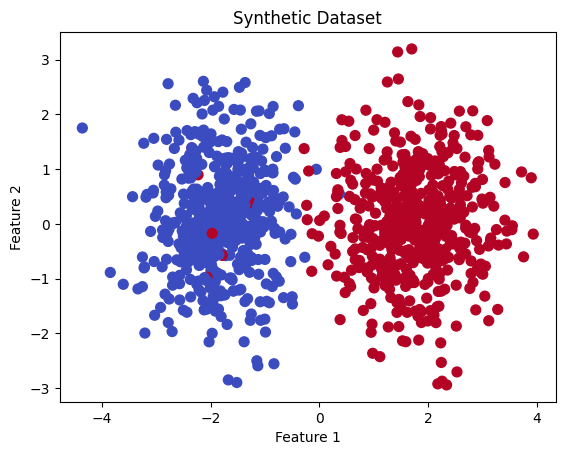

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
class Logistic_Regression():

    def __init__(self, learning_rate, epochs):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):

        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            y_hat = self.sigmoid(np.dot(X_train, self.coef_))

            coef_slope = np.dot(X_train.T, (y_hat - y_train)) / X_train.shape[0]

            self.coef_ = self.coef_ - (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = self.sigmoid(np.dot(X_test, self.coef_))

        return (y_pred >= 0.5).astype(int)

In [8]:
logistic_ = Logistic_Regression(learning_rate=0.01, epochs=1000)

In [9]:
logistic_.fit(X_train, y_train)

Coef_: [ 0.10353778  1.8124341  -0.06278968]


In [10]:
y_pred = logistic_.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [12]:
print(f"Accuracy : {accuracy * 100:.2f}%")

Accuracy : 99.00%
